# Customer Churn Prediction

This notebook performs Exploratory Data Analysis (EDA), cleaning, feature preprocessing, and modeling on `classification_dataset.csv`.

**Type:** Classification


## 1. Imports & setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


## 2. Load & preview data

In [8]:
# Load dataset
df = pd.read_csv('classification_dataset.csv')
#print shape
print("Dataset shape:", df.shape)
#print tail
df.tail()

Dataset shape: (1000, 9)


,age,income,days_active,num_transactions,avg_transaction,account_balance,region,signup_channel,churn
995,18.0,90784.628442,218.0,17.0,349.206044,171898.798508,South,Referral,0
996,35.0,68743.497696,NaN,20.0,313.381761,26961.318431,North,Web,0
997,49.0,38079.541086,91.0,31.0,NaN,-5000.000000,West,Web,0
998,64.0,54065.859423,NaN,20.0,NaN,88538.993718,West,NaN,0
999,66.0,48607.279801,238.0,20.0,379.601055,51843.857321,North,Referral,0


## 3. Exploratory Data Analysis (EDA)

age                  97
income               94
days_active          98
num_transactions    100
avg_transaction     105
account_balance     104
region               97
signup_channel       80
churn                 0
dtype: int64
0    864
1    136
Name: churn, dtype: int64


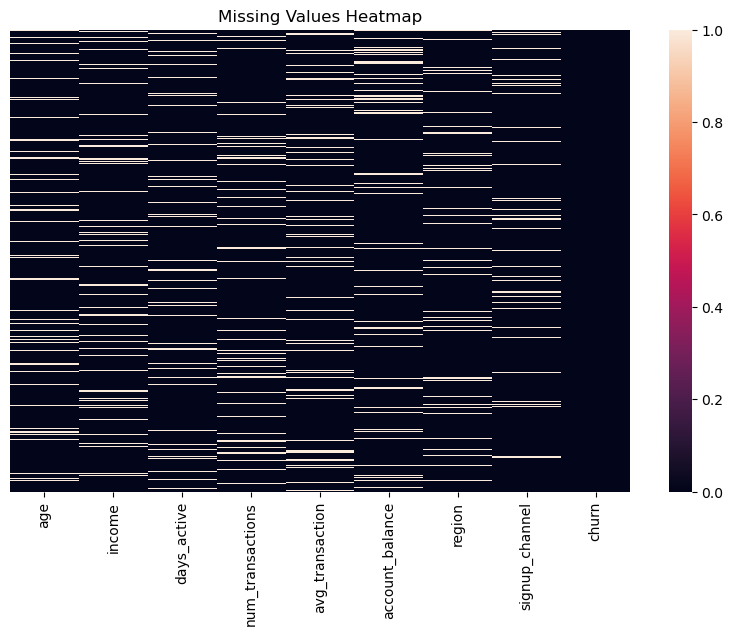

In [11]:
# Basic EDA
print(df.isnull().sum())
print(df['churn'].value_counts())
# Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## 4. Data Cleaning & Preprocessing

In [12]:
# Handle missing values and scale features
numeric_features = ['age', 'income', 'days_active', 'num_transactions', 'avg_transaction', 'account_balance']
categorical_features = ['region', 'signup_channel']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## 5. Modeling & Evaluation

In [23]:
# Train/test split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)
# make predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# evaluate model 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       173
           1       0.36      0.15      0.21        27

    accuracy                           0.85       200
   macro avg       0.62      0.55      0.56       200
weighted avg       0.81      0.85      0.82       200


ROC AUC Score: 0.8937058445728966

Confusion Matrix:
[[166   7]
 [ 23   4]]
